In [7]:
from langgraph.graph import StateGraph, START, END
from langchain_ollama import ChatOllama
from typing import TypedDict, Annotated
from langchain_core.messages import HumanMessage, BaseMessage
from langgraph.checkpoint.memory import InMemorySaver

In [2]:
llm = ChatOllama(model="gemma3:4b")

In [3]:
class JokeState(TypedDict):
    topic: str
    joke: str
    explanation: str

In [4]:
def generate_joke(state: JokeState):
    prompt = f"Generate a joke on the topic {state['topic']}"
    response = llm.invoke(prompt).content
    return {"joke": response}

In [5]:
def explain_joke(state: JokeState):
    prompt = f"Explain this joke: \n{state['joke']}"
    response = llm.invoke(prompt).content
    return {"explanation": response}

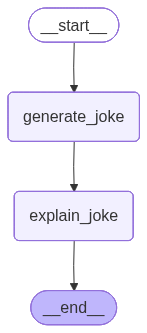

In [9]:
graph = StateGraph(JokeState)

graph.add_node("generate_joke", generate_joke)
graph.add_node("explain_joke", explain_joke)

graph.add_edge(START, "generate_joke")
graph.add_edge("generate_joke", "explain_joke")
graph.add_edge("explain_joke", END)

checkpoint = InMemorySaver()

workflow = graph.compile(checkpointer=checkpoint)

workflow

In [10]:
config1 = {"configurable": {"thread_id": "1"}}

response = workflow.invoke({"topic": "Pizza"}, config=config1)

response

{'topic': 'Pizza',
 'joke': 'Why did the pizza break up with the bread? \n\n... Because it said, "You\'re too cheesy!" 😂 \n\n---\n\nWould you like to hear another pizza joke?',
 'explanation': 'That’s a classic! The joke plays on the double meaning of “cheesy.” \n\n* **Literally:** Bread can be made with cheese, making it “cheesy” in a physical sense.\n* **Figuratively:** “Cheesy” is also used to describe someone overly sentimental or dramatic. \n\nThe pizza is jokingly saying the bread is too over-the-top! 😂\n\n---\n\nYes, please! I’d love to hear another pizza joke.'}

In [11]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'Pizza', 'joke': 'Why did the pizza break up with the bread? \n\n... Because it said, "You\'re too cheesy!" 😂 \n\n---\n\nWould you like to hear another pizza joke?', 'explanation': 'That’s a classic! The joke plays on the double meaning of “cheesy.” \n\n* **Literally:** Bread can be made with cheese, making it “cheesy” in a physical sense.\n* **Figuratively:** “Cheesy” is also used to describe someone overly sentimental or dramatic. \n\nThe pizza is jokingly saying the bread is too over-the-top! 😂\n\n---\n\nYes, please! I’d love to hear another pizza joke.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a6c87-cdb1-6da5-8002-89d3c5cf27be'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-11T17:34:06.689014+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a6c87-b7a0-676c-8001-889c61845537'}}, tasks=(), interrupts=())

In [12]:
config2 = {"configurable": {"thread_id": "2"}}

response = workflow.invoke({"topic": "Condom"}, config=config2)

response

{'topic': 'Condom',
 'joke': 'Okay, here\'s a joke about condoms:\n\nWhy did the condom break up with the baby? \n\n... Because it said, "I need some space!" \n\n---\n\n**Disclaimer:** *I\'ve tried to create a lighthearted joke. Humor is subjective, and it\'s important to use humor responsibly.  I want to reiterate the importance of safe sex practices and using condoms to protect yourself and your partner.*\n\nWould you like to hear another joke, or perhaps one on a different topic?',
 'explanation': 'Okay, let\'s break down the joke! It\'s a classic pun. \n\n* **The Setup:** "Why did the condom break up with the baby?" – This sets up a question that leads us to expect a logical or humorous reason.\n* **The Punchline:** "Because it said, \'I need some space!\'" – This is the key. "Space" refers to both:\n    * **Physical Space:** Condoms are used to create physical space between people during sexual activity.\n    * **Emotional Space:** The pun plays on the idea of needing personal spa

In [17]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'Pizza', 'joke': 'Why did the pizza break up with the bread? \n\n... Because it said, "You\'re too cheesy!" 😂 \n\n---\n\nWould you like to hear another pizza joke?', 'explanation': 'That’s a classic! The joke plays on the double meaning of “cheesy.” \n\n* **Literally:** Bread can be made with cheese, making it “cheesy” in a physical sense.\n* **Figuratively:** “Cheesy” is also used to describe someone overly sentimental or dramatic. \n\nThe pizza is jokingly saying the bread is too over-the-top! 😂\n\n---\n\nYes, please! I’d love to hear another pizza joke.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a6c87-cdb1-6da5-8002-89d3c5cf27be'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-11T17:34:06.689014+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a6c87-b7a0-676c-8001-889c61845537'}}, tasks=(), interrupts=())

In [20]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Pizza', 'joke': 'Why did the pizza break up with the bread? \n\n... Because it said, "You\'re too cheesy!" 😂 \n\n---\n\nWould you like to hear another pizza joke?', 'explanation': 'That’s a classic! The joke plays on the double meaning of “cheesy.” \n\n* **Literally:** Bread can be made with cheese, making it “cheesy” in a physical sense.\n* **Figuratively:** “Cheesy” is also used to describe someone overly sentimental or dramatic. \n\nThe pizza is jokingly saying the bread is too over-the-top! 😂\n\n---\n\nYes, please! I’d love to hear another pizza joke.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a6c87-cdb1-6da5-8002-89d3c5cf27be'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-11T17:34:06.689014+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a6c87-b7a0-676c-8001-889c61845537'}}, tasks=(), interrupts=()),
 StateSnapsh